## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, revMeans, revIntns = [],[],[],[]
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s1_2017-01-26_1545', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p11_s1_2017-02-08_1635', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p14_s1_2017-02-15_1115', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p3_s1_2017-01-31_1514', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p4_s2_2017-02-02_1303', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p5_s4_2017-02-07_1220', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p6_s4_2017-02-11_1549', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s3_2017-01-31_1052', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p13_s1_2017-02-14_1637', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p15_s1_2017-02-15_1630', '/Users/ego

In [3]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = np.array(thisStair.reversalIntensities) #detectRevs(thisStair)
        theseRevIntns[theseRevIntns<-4] = np.nan
        print np.round(theseRevIntns,1)
        revIntns.append(theseRevIntns[-8:])
        revMeans.append([np.average(theseRevIntns[-4:]),
                         np.average(theseRevIntns[-6:]),
                         np.average(theseRevIntns[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s1_2017-01-26_1545
[-2.  -3.  -2.  -3.  -2.4 -3.  -1.2 -1.8 -1.2 -1.5]
[-1.  -2.  -1.  -2.  -1.4 -2.  -1.4 -2.  -1.7 -2. ]
[-2.  -1.  -3.  -1.  -2.2 -1.6 -2.8 -2.2 -2.5 -1.9]
[-3.  -1.  -2.  -1.  -2.2 -1.6 -2.2 -1.6 -1.9 -1.6]
[-1.  -2.  -1.  -2.  -1.4 -2.6 -1.4 -2.  -1.7 -2.6]
[-2.  -3.  -1.  -3.  -1.8 -2.4 -1.8 -2.4 -1.8 -2.4]
[-4.  -3.   nan -3.  -3.6 -3.  -3.6 -2.4 -2.7 -1.2]
[-4.  -1.  -3.  -2.  -2.6 -2.  -3.2 -2.6 -2.9 -2.3]
[-2.  -3.  -1.  -3.  -1.8 -2.4 -1.2 -1.8 -1.5 -1.8]
[-2.  -1.  -2.  -1.  -2.2 -1.6 -2.8 -1.6 -1.9 -1.6]
[-4.  -1.  -2.  -1.  -2.8 -2.2 -2.8 -2.2 -3.4 -2.5]
[-3.  -1.  -2.  -1.  -2.2 -1.6 -2.8 -2.2 -2.5 -1.3]
[-3.  -2.  -3.  -2.  -2.6 -2.  -2.6 -1.4 -2.3 -1.4]
[ nan -4.   nan -2.  -2.6 -1.4 -2.  -1.4 -2.6 -2. ]
[-2.  -1.  -2.  -1.  -2.2 -1.6 -2.8 -2.2 -2.5 -1.6]
[-3.  -1.  -3.  -2.  -2.6 -2.  -2.6 -1.4 -2.  -1.4]
[-3.  -1.  -2.  -1.  -2.2 -1.  -2.2 -1.  -1.9 -1.3]
[ nan  nan  nan  nan  nan 

In [4]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(870, 30)
Index([u'dom', u'expName', u'expPara', u'fixCross', u'mcBsf', u'mcBv',
       u'mcPeriFade', u'mcPeriGap', u'mcSf', u'mcSz', u'meanRev6', u'nRevs',
       u'participant', u'session', u'stairLabel', u'stairMean', u'stairStart',
       u'targOri1', u'targOri2', u'targSf', u'targSz', u'targTpeak',
       u'targTtot', u'targV', u'targXoff1', u'targXoff2', u'targYoff', u'time',
       u'trialT', u'condLabel'],
      dtype='object')


,dom,expName,expPara,fixCross,mcBsf,mcBv,mcPeriFade,mcPeriGap,mcSf,mcSz,...,targSz,targTpeak,targTtot,targV,targXoff1,targXoff2,targYoff,time,trialT,condLabel
0,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.60,16,112,0.1,256,...,32,1.0,1.0,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0.0
1,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.0,1.0,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0.0
2,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,1.0,1.0,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0.0
3,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.5,1.0,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0.0
4,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,0.5,1.0,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0.0


In [5]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(870,)
(870,)
(870, 3)
(870, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,0.60,0,-3.0,1.0,0.0,48
1,0.01,0,-3.0,1.0,0.0,48
2,9.60,0,0.0,1.0,0.0,48
3,0.01,0,0.0,1.5,0.0,48
4,9.60,0,-3.0,0.5,0.0,48


In [6]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on=['participant','mcBv','targTpeak',
                                                       'targXoff2', 'targV', 'stairStart'])
stairsWithRevs.head(5)

(870, 3)


,meanRevs4,meanRevs6,meanRevs8,mcBv,participant,stairStart,targTpeak,targV,targXoff2,dom,...,targOri1,targOri2,targSf,targSz,targTtot,targXoff1,targYoff,time,trialT,condLabel
0,-1.425,-1.85,-2.0125,0.60,0,-3.0,1.0,0.0,48,NaN,...,0,0,0.1,32,1.0,-48,0,2017-01-26_1545,2,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0.0
1,-1.775,-1.75,-1.6875,0.01,0,-3.0,1.0,0.0,48,NaN,...,0,0,0.1,32,1.0,-48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0.0
2,-2.350,-2.20,-2.1500,9.60,0,0.0,1.0,0.0,48,NaN,...,0,0,0.1,32,1.0,-48,0,2017-01-26_1545,2,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0.0
3,-1.825,-1.85,-1.7625,0.01,0,0.0,1.5,0.0,48,NaN,...,0,0,0.1,32,1.0,-48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0.0
4,-1.925,-1.95,-1.8375,9.60,0,-3.0,0.5,0.0,48,NaN,...,0,0,0.1,32,1.0,-48,0,2017-01-26_1545,2,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0.0


In [7]:
condRevMeans = stairsWithRevs.groupby(['condLabel','participant'])['meanRevs4','meanRevs6','meanRevs8'].mean()
#print condRevMeans.head(6)
#print condRevMeans.index.get_level_values('participant')
#print condRevMeans.index
#condRevMeans['condLabel'] = condRevMeans.index
condRevMeans['participant'] = condRevMeans.index.get_level_values('participant')
condRevMeans['condLabel'] = condRevMeans.index.get_level_values('condLabel')
condRevMeans = condRevMeans.reset_index(drop=True)
print condRevMeans.shape
condRevMeans.head(6)

(435, 5)


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel
0,-1.30500,-1.303333,-1.290000,0,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0
1,-1.11000,-1.090000,-1.105000,1,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0
2,-0.79625,-0.780833,-0.810625,2,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0
3,-0.98500,-0.990000,-1.011250,9,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0
4,-1.05500,-1.053333,-1.052500,13,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0
5,-1.29500,-1.280000,-1.297500,14,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0


In [8]:
stairsClean = stairs.drop(['stairStart','meanRev6','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevMeans, stairsClean, how='inner', on=['condLabel','participant'])
conds['Mask\nVelocity'] = np.round(conds.mcBv * 60/35,0)
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'participant', u'condLabel',
       u'dom', u'expName', u'expPara', u'fixCross', u'mcBsf', u'mcBv',
       u'mcPeriFade', u'mcPeriGap', u'mcSf', u'mcSz', u'nRevs', u'session',
       u'stairMean', u'targOri1', u'targOri2', u'targSf', u'targSz',
       u'targTpeak', u'targTtot', u'targV', u'targXoff1', u'targXoff2',
       u'targYoff', u'time', u'trialT', u'Mask\nVelocity'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel,dom,expName,expPara,fixCross,mcBsf,...,targSz,targTpeak,targTtot,targV,targXoff1,targXoff2,targYoff,time,trialT,Mask Velocity
0,-1.30500,-1.303333,-1.290000,0,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0,0.0,mc2_tgT-mcBv2,peri,1,0.05,...,28,0.33,0.66,0.0,-100,100,0,2017-02-18_1114,2,0.0
1,-1.11000,-1.090000,-1.105000,1,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0,0.0,mc2_tgT-mcBv2,peri,1,0.05,...,28,0.33,0.66,0.0,-100,100,0,2017-02-21_1410,2,0.0
2,-0.79625,-0.780833,-0.810625,2,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0,1.0,mc2_tgT-mcBv2,peri,1,0.05,...,28,0.33,0.66,0.0,-100,100,0,2017-02-23_1216,2,0.0
3,-0.98500,-0.990000,-1.011250,9,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0,1.0,mc2_tgT-mcBv2,peri,1,0.05,...,28,0.33,0.66,0.0,-100,100,0,2017-02-20_1107,2,0.0
4,-1.05500,-1.053333,-1.052500,13,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0,1.0,mc2_tgT-mcBv2,peri,1,0.05,...,28,0.33,0.66,0.0,-100,100,0,2017-02-23_1059,2,0.0
5,-1.29500,-1.280000,-1.297500,14,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0,1.0,mc2_tgT-mcBv2,peri,1,0.05,...,28,0.33,0.66,0.0,-100,100,0,2017-02-22_1002,2,0.0
6,-1.06500,-1.043333,-1.020000,16,mcBv-0.01_tgT-0.33_tgEcc-100_tgV-0.0,0.0,mc2_tgT-mcBv2,peri,1,0.05,...,28,0.33,0.66,0.0,-100,100,0,2017-02-18_1338,2,0.0


In [9]:
#print conds.shape
dfStatCent = conds.ix[(conds.targXoff2==48) & (conds.targV==0)]
dfStatPeri = conds.ix[(conds.targXoff2==104) & (conds.targV==0)]
dfMtnCent = conds.ix[(conds.targXoff2==48) & (conds.targV==3.5)]
dfMtnPeri = conds.ix[(conds.targXoff2==104) & (conds.targV==3.5)]

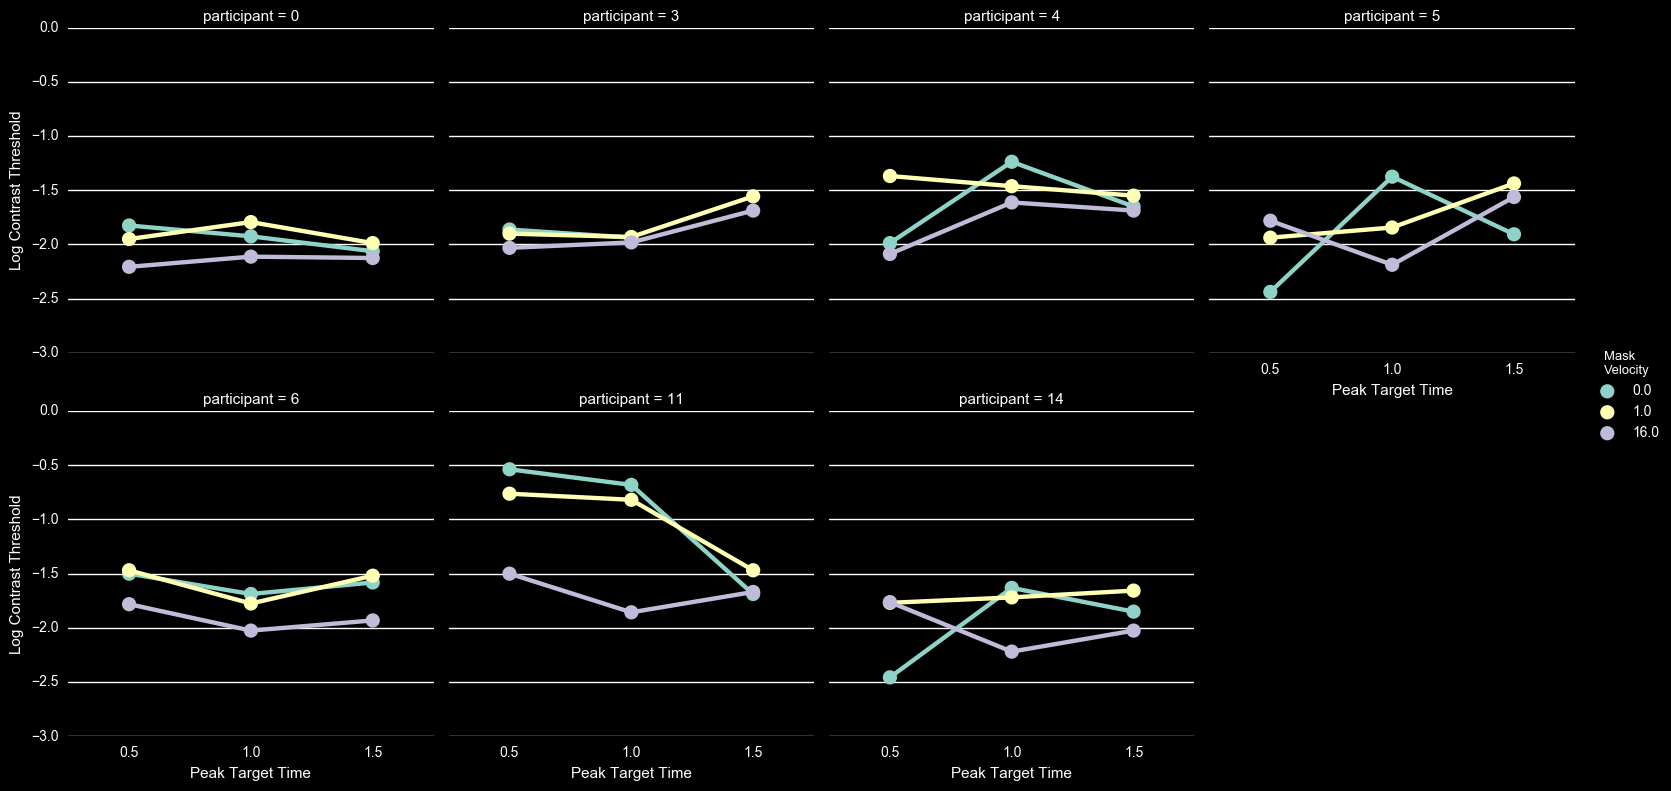

In [10]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfStatCent, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

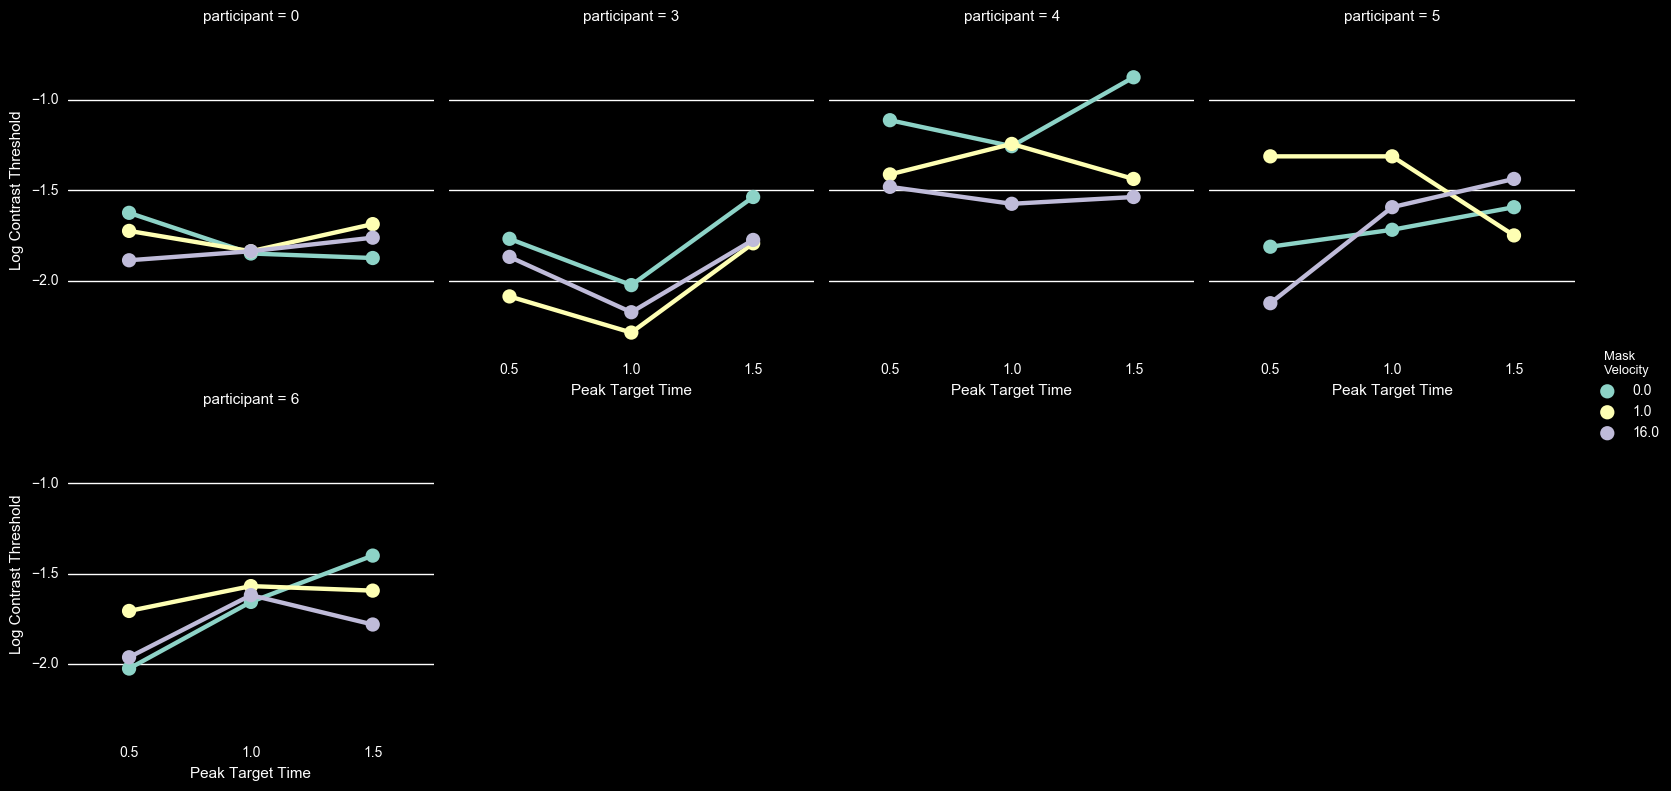

In [11]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfStatPeri, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

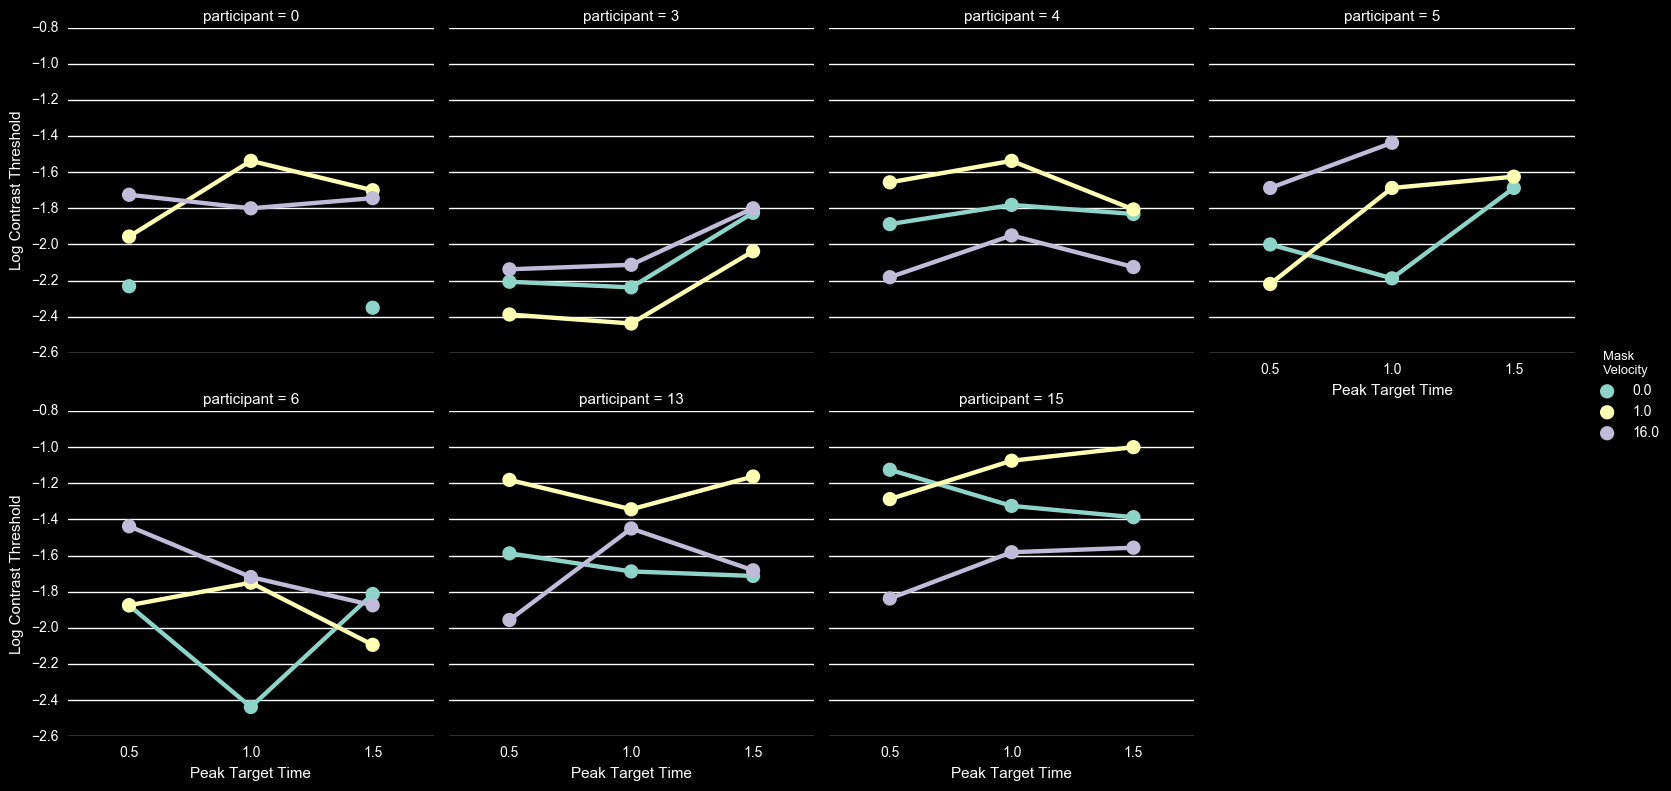

In [12]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfMtnCent, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

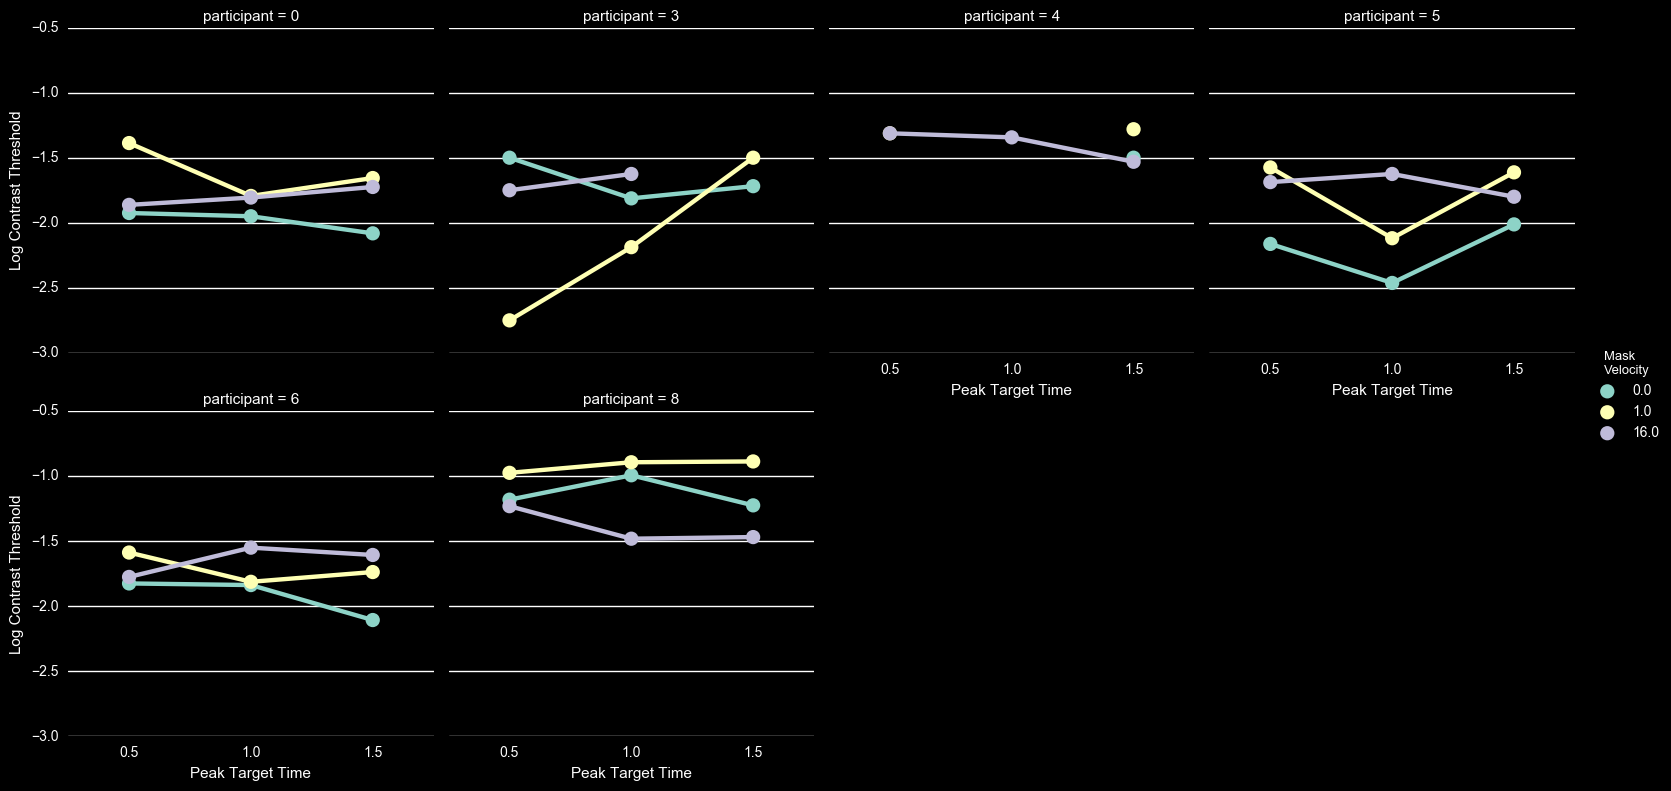

In [13]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfMtnPeri, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

(-2.3, -1.4)

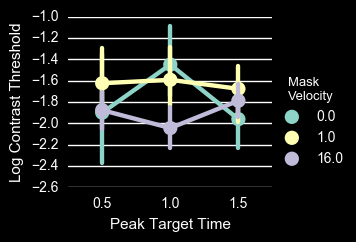

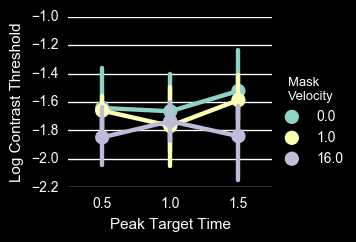

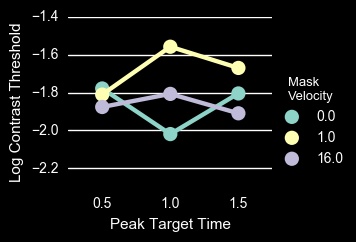

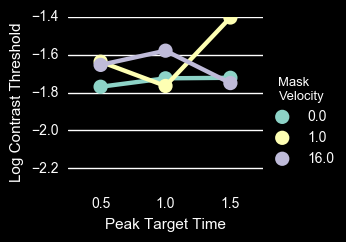

In [29]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity',  
                   data=dfStatCent, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity', 
                   data=dfStatPeri, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity', 
                   data=dfMtnCent, ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.4)
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity', 
                   data=dfMtnPeri, ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.4)

# Model testing

## Centering

In [15]:
# include the order of the reversal intensities
colNames = ['1','2','3','4','5','6','7','8']
revIntnsDF = pd.DataFrame(revIntns, columns=colNames)
#revIntnsDF.head(5)
#print revIntnsDF.head(5)
#print orderInfo.head(5)
#print revIntnsDF.shape
#print orderInfo.shape
ordRevIntns = revIntnsDF.join(orderInfo.reset_index(drop=True))
#print ordRevIntns.shape
#print ordRevIntns.head(5)
df = pd.melt(ordRevIntns, id_vars=['mcBv','participant','stairStart','targTpeak',
                                   'targV','targXoff2'], value_vars=colNames)
df = df.rename(columns={'variable': 'revN', 'value': 'revIntn'})
df.head(5)

,mcBv,participant,stairStart,targTpeak,targV,targXoff2,revN,revIntn
0,0.60,0,-3.0,1.0,0.0,48,1,-2.0
1,0.01,0,-3.0,1.0,0.0,48,1,-1.0
2,9.60,0,0.0,1.0,0.0,48,1,-3.0
3,0.01,0,0.0,1.5,0.0,48,1,-2.0
4,9.60,0,-3.0,0.5,0.0,48,1,-1.0


In [16]:
df0 = pd.DataFrame()
df0['participant'] = df.participant
df0['targEcc'] = (df.targXoff2 - 48)/(104-48) # 0=center, 1=peri
df0['targV'] = df.targV/np.max(df.targV) # 0=static, 1=dynamic
df0.ix[df.mcBv==.01, 'mcBv'] = 0 # 0=static mask; 1=slow mask; 2=fast mask
df0.ix[df.mcBv==0.6, 'mcBv'] = .5
df0.ix[df.mcBv==9.6, 'mcBv'] = 1
df0['targOnset'] = df.targTpeak - .5 # 0=onset in the beginning
df0['stairStart'] = (df.stairStart+3)/3 # 0=low start; 1=high start
df0['revN'] = df.revN
df0['revIntn'] = df.revIntn
df0.reset_index(drop=True, inplace=True)
df0.revIntn = df0.revIntn.interpolate()
df0.head(10)

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
0,0,0.0,0.0,0.5,0.5,0.0,1,-2.0
1,0,0.0,0.0,0.0,0.5,0.0,1,-1.0
2,0,0.0,0.0,1.0,0.5,1.0,1,-3.0
3,0,0.0,0.0,0.0,1.0,1.0,1,-2.0
4,0,0.0,0.0,1.0,0.0,0.0,1,-1.0
5,0,0.0,0.0,1.0,0.5,0.0,1,-1.0
6,0,0.0,0.0,0.5,1.0,0.0,1,-2.0
7,0,0.0,0.0,1.0,0.0,1.0,1,-3.0
8,0,0.0,0.0,0.0,0.0,0.0,1,-1.0
9,0,0.0,0.0,0.0,0.0,1.0,1,-2.0


In [17]:
import statsmodels as sm
import statsmodels.formula.api as smf

The model with all three mask speeds.

In [18]:
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df0, missing='drop', groups=df0['participant'])
#print sm.stats.anova.anova_lm(md0,md)
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       6960         Method:                  REML      
No. Groups:             18           Scale:                   0.3554    
Min. group size:        144          Likelihood:              -6347.2753
Max. group size:        896          Converged:               Yes       
Mean group size:        386.7                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.382    0.072 -19.229 0.000 -1.523 -1.241
targEcc                       0.060    0.030   2.008 0.045  0.001  0.119
targV                        -0.328    0.053  -6.186 0.000 -0.432 -0.224
targEcc:targV                 0.048    0.076   0.624 0.533 -0.102  0

In [19]:
#print dir(mdf)
#print mdf.params
mds = pd.DataFrame({
        'targV' : np.repeat([0,1],9),
        'mcBv' : np.tile(np.repeat([0,.5,1],3),2), 
        'targOnset' : np.tile(np.linspace(0,1,3),6)
    })
mds['contrast'] = mdf.params['Intercept'] + \
    mdf.params['targV']*mds.targV + \
    mdf.params['mcBv']*mds.mcBv + \
    mdf.params['targOnset']*mds.targOnset + \
    mdf.params['targV:targOnset']*mds.targV*mds.targOnset + \
    mdf.params['mcBv:targOnset']*mds.mcBv*mds.targOnset #+ \
    #mdf.params['targV:mcBv']*mds.targV*mds.mcBv + \
    #mdf.params['targV:mcBv:targOnset']*mds.targV*mds.mcBv*mds.targOnset
mds['targTpeak'] = mds.targOnset + 0.5
mds.ix[mds.mcBv==0, 'Mask\nVelocity'] = 0
mds.ix[mds.mcBv==.5, 'Mask\nVelocity'] = 1
mds.ix[mds.mcBv==1, 'Mask\nVelocity'] = 16
mds.head(5)

,mcBv,targOnset,targV,contrast,targTpeak,Mask Velocity
0,0.0,0.0,0,-1.381900,0.5,0.0
1,0.0,0.5,0,-1.424058,1.0,0.0
2,0.0,1.0,0,-1.466217,1.5,0.0
3,0.5,0.0,0,-1.484282,0.5,1.0
4,0.5,0.5,0,-1.497883,1.0,1.0


(-2.55, -1.2)

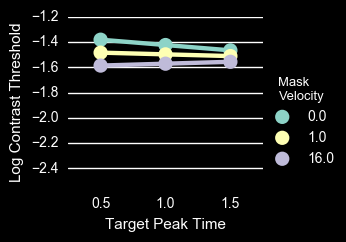

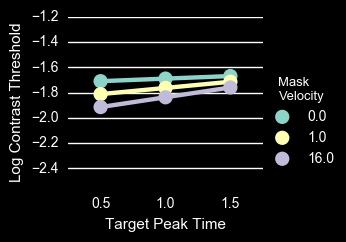

In [20]:
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds[mds.targV==0], ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.55,-1.2)
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds[mds.targV==1], ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.55,-1.2)

### Nonlinearities in mask speeds

A model with only static and fast masks.

In [21]:
df02 = df0.drop(df0[df0.mcBv==.5].index)
#df02.ix[df02.mcBv==2,'mcBv'] = 1
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df02, groups=df02['participant'])
mdf = md.fit()
print(mdf.summary())
df02.head(5)

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       5760         Method:                  REML      
No. Groups:             18           Scale:                   0.3013    
Min. group size:        96           Likelihood:              -4788.7425
Max. group size:        704          Converged:               Yes       
Mean group size:        320.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.419    0.068 -20.995 0.000 -1.551 -1.286
targEcc                       0.068    0.028   2.426 0.015  0.013  0.123
targV                        -0.342    0.053  -6.411 0.000 -0.447 -0.237
targEcc:targV                 0.059    0.076   0.768 0.443 -0.091  0

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
1,0,0.0,0.0,0.0,0.5,0.0,1,-1.0
2,0,0.0,0.0,1.0,0.5,1.0,1,-3.0
3,0,0.0,0.0,0.0,1.0,1.0,1,-2.0
4,0,0.0,0.0,1.0,0.0,0.0,1,-1.0
5,0,0.0,0.0,1.0,0.5,0.0,1,-1.0


A model with only static and slow masks.

In [22]:
df01 = df0.drop(df[df.mcBv==1].index)
df01.ix[df01.mcBv==.5,'mcBv'] = 1
df01.reset_index(drop=True, inplace=True)
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df01, groups=df01['participant'])
mdf = md.fit()
print(mdf.summary())
df01.head(5)

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       6960         Method:                  REML      
No. Groups:             18           Scale:                   0.3562    
Min. group size:        144          Likelihood:              -6355.3603
Max. group size:        896          Converged:               Yes       
Mean group size:        386.7                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.388    0.071 -19.498 0.000 -1.528 -1.249
targEcc                       0.069    0.030   2.256 0.024  0.009  0.128
targV                        -0.370    0.057  -6.442 0.000 -0.483 -0.258
targEcc:targV                 0.052    0.083   0.634 0.526 -0.109  0

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
0,0,0.0,0.0,1.0,0.5,0.0,1,-2.0
1,0,0.0,0.0,0.0,0.5,0.0,1,-1.0
2,0,0.0,0.0,1.0,0.5,1.0,1,-3.0
3,0,0.0,0.0,0.0,1.0,1.0,1,-2.0
4,0,0.0,0.0,1.0,0.0,0.0,1,-1.0


### Nonlinearities in target onsets

#### Early and late onset targets

In [23]:
df02 = df0.drop(df0[df0.targOnset==0.5].index)
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df02, groups=df02['participant'])
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       5088         Method:                  REML      
No. Groups:             18           Scale:                   0.3385    
Min. group size:        96           Likelihood:              -4531.7789
Max. group size:        640          Converged:               Yes       
Mean group size:        282.7                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.394    0.071 -19.659 0.000 -1.533 -1.255
targEcc                       0.071    0.031   2.292 0.022  0.010  0.132
targV                        -0.245    0.057  -4.314 0.000 -0.357 -0.134
targEcc:targV                -0.020    0.081  -0.248 0.804 -0.180  0

#### Early- and mid-onset targets

In [24]:
df01 = df0.drop(df0[df0.targOnset==1].index)
df01.ix[df01.targOnset==0.5,'targOnset'] = 1
#df01.reset_index(drop=True, inplace=True)
#dfC02.ix[dfC02.mcBv==2,'mcBv'] = 1
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df01, groups=df01['participant'])
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       5760         Method:                  REML      
No. Groups:             18           Scale:                   0.2949    
Min. group size:        96           Likelihood:              -4728.9534
Max. group size:        704          Converged:               Yes       
Mean group size:        320.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.384    0.075 -18.468 0.000 -1.531 -1.237
targEcc                       0.074    0.029   2.572 0.010  0.018  0.131
targV                        -0.248    0.053  -4.682 0.000 -0.352 -0.144
targEcc:targV                -0.019    0.076  -0.250 0.802 -0.168  0

#### Mid- and late-onset targets

In [25]:
df12 = df0.drop(df0[df0.targOnset==0].index)
df12.ix[df12.targOnset==0.5,'targOnset'] = 0
#df01.reset_index(drop=True, inplace=True)
#dfC02.ix[dfC02.mcBv==2,'mcBv'] = 1
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df12, groups=df12['participant'])
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       5760         Method:                  REML      
No. Groups:             18           Scale:                   0.2916    
Min. group size:        96           Likelihood:              -4695.0479
Max. group size:        704          Converged:               Yes       
Mean group size:        320.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.373    0.068 -20.058 0.000 -1.508 -1.239
targEcc                       0.047    0.024   1.943 0.052 -0.000  0.095
targV                        -0.465    0.052  -8.972 0.000 -0.567 -0.363
targEcc:targV                 0.137    0.074   1.854 0.064 -0.008  0

##### Mid- and late-onset targets: Model construction

In [26]:
print mdf.params
mds = pd.DataFrame({
        'targEcc' : np.repeat([0,1],12),
        'targV' : np.tile(np.repeat([0,1],6),2),
        'mcBv' : np.tile(np.repeat([0,1,2],2),4), 
        'targOnset' : np.tile(np.linspace(0,1,2),12)
    })
mds['contrast'] = mdf.params['Intercept'] + \
    mdf.params['targEcc']*mds.targEcc + \
    mdf.params['targV']*mds.targV + \
    mdf.params['targEcc:targV']*mds.targEcc*mds.targV + \
    mdf.params['mcBv']*mds.mcBv + \
    mdf.params['targEcc:mcBv']*mds.targEcc*mds.mcBv + \
    mdf.params['targV:mcBv']*mds.targV*mds.mcBv + \
    mdf.params['targEcc:targV:mcBv']*mds.targEcc*mds.targV*mds.mcBv + \
    mdf.params['targOnset']*mds.targOnset + \
    mdf.params['targEcc:targOnset']*mds.targEcc*mds.targOnset + \
    mdf.params['targV:targOnset']*mds.targV*mds.targOnset + \
    mdf.params['targEcc:targV:targOnset']*mds.targEcc*mds.targV*mds.targOnset + \
    mdf.params['mcBv:targOnset']*mds.mcBv*mds.targOnset + \
    mdf.params['targEcc:mcBv:targOnset']*mds.targEcc*mds.mcBv*mds.targOnset + \
    mdf.params['targV:mcBv:targOnset']*mds.targV*mds.mcBv*mds.targOnset + \
    mdf.params['targEcc:targV:mcBv:targOnset']*mds.targEcc*mds.targV*mds.mcBv*mds.targOnset
mds.ix[mds.mcBv==0, 'Mask\nVelocity'] = 0
mds.ix[mds.mcBv==1, 'Mask\nVelocity'] = 1
mds.ix[mds.mcBv==2, 'Mask\nVelocity'] = 16
mds.ix[mds.targOnset==0, 'targTpeak'] = 1
mds.ix[mds.targOnset==1, 'targTpeak'] = 1.5
mds.head()

Intercept                      -1.373340
targEcc                         0.047450
targV                          -0.464942
targEcc:targV                   0.137236
mcBv                           -0.207881
targEcc:mcBv                   -0.046677
targV:mcBv                      0.415009
targEcc:targV:mcBv              0.011453
targOnset                      -0.107677
targEcc:targOnset               0.040925
targV:targOnset                 0.315629
targEcc:targV:targOnset        -0.213320
mcBv:targOnset                  0.134092
targEcc:mcBv:targOnset         -0.070914
targV:mcBv:targOnset           -0.385644
targEcc:targV:mcBv:targOnset    0.213138
stairStart                      0.127685
Intercept RE                    0.512381
dtype: float64


,mcBv,targEcc,targOnset,targV,contrast,Mask Velocity,targTpeak
0,0,0,0.0,0,-1.373340,0.0,1.0
1,0,0,1.0,0,-1.481017,0.0,1.5
2,1,0,0.0,0,-1.581221,1.0,1.0
3,1,0,1.0,0,-1.554805,1.0,1.5
4,2,0,0.0,0,-1.789102,16.0,1.0


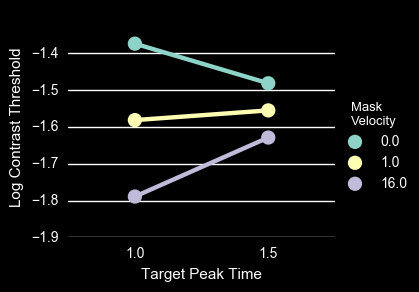

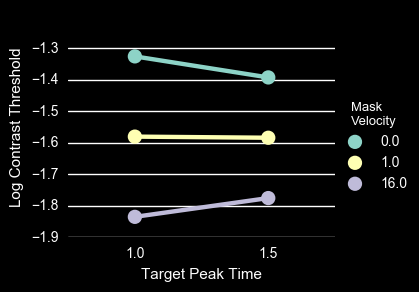

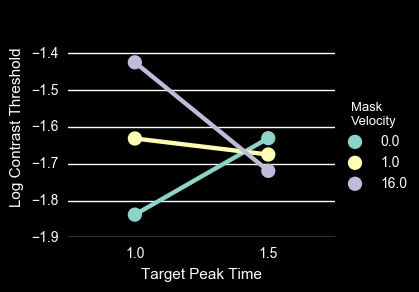

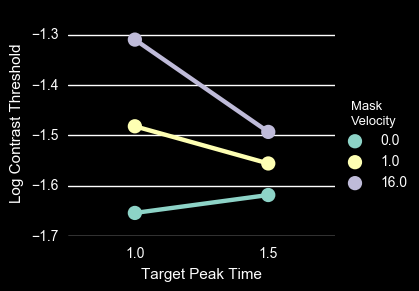

In [27]:
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==0) & (mds.targEcc==0)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==0) & (mds.targEcc==1)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==1) & (mds.targEcc==0)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==1) & (mds.targEcc==1)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')

## True centering

In [73]:
df.head()

,mcBv,participant,stairStart,targTpeak,targV,targXoff2,revN,revIntn
0,0.60,0,-3,1.0,0.0,48,1,-2.0
1,0.01,0,-3,1.0,0.0,48,1,-1.0
2,9.60,0,0,1.0,0.0,48,1,-3.0
3,0.01,0,0,1.5,0.0,48,1,-2.0
4,9.60,0,-3,0.5,0.0,48,1,-1.0


In [76]:
dfC = pd.DataFrame()
dfC['participant'] = df.participant
dfC['targEcc'] = ((df.targXoff2 - 48)/(104-48))*2-1 # 0=center, 1=peri
#dfC['targEcc'] = (df.targXoff2 - 76)/28 # -1=center, 1=peri
dfC['targV'] = 2*(df.targV/np.max(df.targV))-1 # 0=static, 1=dynamic
dfC.ix[df.mcBv==.01, 'mcBv'] = -1 # 0=static mask; 1=slow mask; 2=fast mask
dfC.ix[df.mcBv==0.6, 'mcBv'] = 0
dfC.ix[df.mcBv==9.6, 'mcBv'] = 1
dfC['targOnset'] = 2*(df.targTpeak - .5)-1 # 0=onset in the beginning
dfC['stairStart'] = (df.stairStart+1.5)/1.5 # -1=low start; 1=high start
dfC['revN'] = df.revN
dfC['revIntn'] = df.revIntn
dfC.revIntn = dfC.revIntn.interpolate()
dfC.head(10)

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
0,0,-1.0,-1.0,0.0,0.0,-1.0,1,-2.0
1,0,-1.0,-1.0,-1.0,0.0,-1.0,1,-1.0
2,0,-1.0,-1.0,1.0,0.0,1.0,1,-3.0
3,0,-1.0,-1.0,-1.0,1.0,1.0,1,-2.0
4,0,-1.0,-1.0,1.0,-1.0,-1.0,1,-1.0
5,0,-1.0,-1.0,1.0,0.0,-1.0,1,-1.0
6,0,-1.0,-1.0,0.0,1.0,-1.0,1,-2.0
7,0,-1.0,-1.0,1.0,-1.0,1.0,1,-3.0
8,0,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0
9,0,-1.0,-1.0,-1.0,-1.0,1.0,1,-2.0


The model with all three mask speeds.

In [77]:
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', dfC, groups=dfC['participant'])
#print sm.stats.anova.anova_lm(md0,md)
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       3600         Method:                  REML      
No. Groups:             10           Scale:                   0.6258    
Min. group size:        144          Likelihood:              -4327.6035
Max. group size:        576          Converged:               Yes       
Mean group size:        360.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.611    0.102 -15.765 0.000 -1.811 -1.411
targEcc                       0.053    0.015   3.616 0.000  0.024  0.082
targV                        -0.052    0.015  -3.512 0.000 -0.080 -0.023
targEcc:targV                 0.018    0.015   1.257 0.209 -0.010  0